# Uploading Data to Colab

By running the following cell below, this prompt you to click the button 'Choose Files'. Once you click the button it will prompt you your Finder (MacOS) or File Explorer (Windows). Select the .csv files and it will upload them to this project which you can then us!

Disclaimer: If you close your laptop or do not run the colab frequently, you will have to reconnect the notebook. However, you will need to rerun all previous cells and that includes reuploading the .csv files again.

In [1]:
#File uploading
try:
    from google.colab import files
    uploaded = files.upload()
except ImportError as e:
    pass

Saving USvideos.csv to USvideos.csv


# Logistic Regression - Ethan Villalovoz

# Imports

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Performing Logistic Regression (Pre-Normalized Data)

In [3]:
# Load the dataset
data = pd.read_csv("./USvideos.csv")

# Define target variable (y)
median_views = data['views'].median()
data['viral'] = (data['views'] >= median_views).astype(int)  # Binary classification: 1 for viral, 0 for non-viral

# Prepare the features
X = data[['views', 'likes', 'dislikes', 'comment_total', 'category_id']]  # Numerical and categorical features
# Preprocess text features like 'tags' if needed and add to X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['viral'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9275
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       803
           1       0.90      0.95      0.93       797

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



In [4]:
# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Map coefficients to feature names
feature_names = X.columns

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the DataFrame
print("Feature Coefficients:")
print(coefficients_df)

Feature Coefficients:
         Feature  Coefficient
2       dislikes     0.000146
3  comment_total     0.000109
0          views     0.000017
1          likes    -0.000032
4    category_id    -0.243570


# Performing Logistic Regression (Normalized Data)

In [5]:
# Additional import
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("./USvideos.csv")

# Define target variable (y)
median_views = data['views'].median()
data['viral'] = (data['views'] >= median_views).astype(int)  # Binary classification: 1 for viral, 0 for non-viral

# Prepare the features
X = data[['views', 'likes', 'dislikes', 'comment_total', 'category_id']]  # Numerical and categorical features

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['viral'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Map coefficients to feature names
feature_names = X.columns

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the DataFrame
print("Feature Coefficients:")
print(coefficients_df)


Accuracy: 0.976875
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       803
           1       0.99      0.96      0.98       797

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

Feature Coefficients:
         Feature  Coefficient
0          views    23.848196
1          likes     3.788244
2       dislikes     3.014816
3  comment_total     1.309091
4    category_id     0.096754


# Logistic Regression Graphs/Diagrams

Here are a few graphs I have plotted that can be used for additional/interesting data findings. The following cells within this section are graphs that were not used in our final presentation/report.

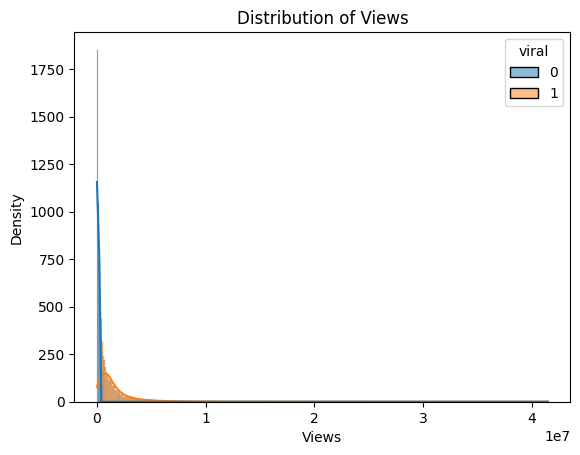

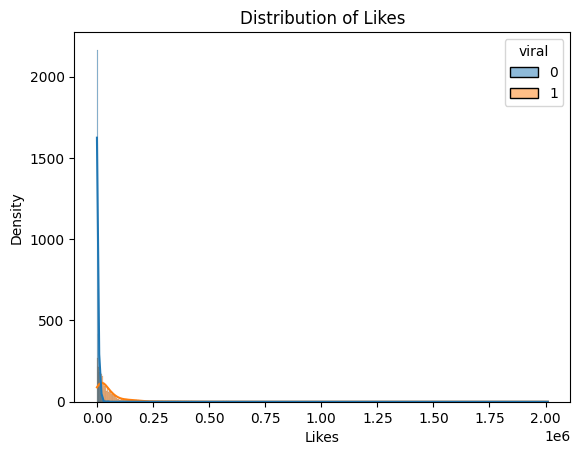

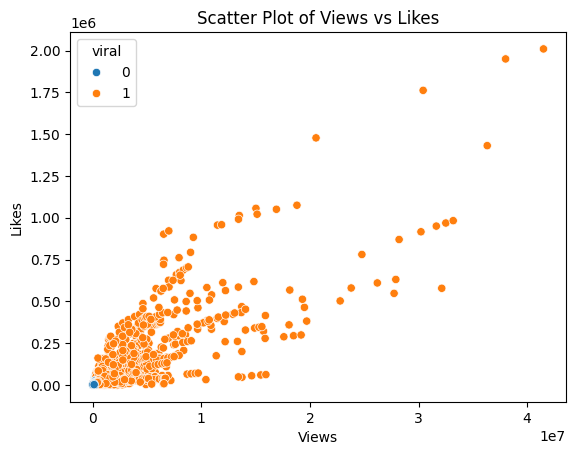

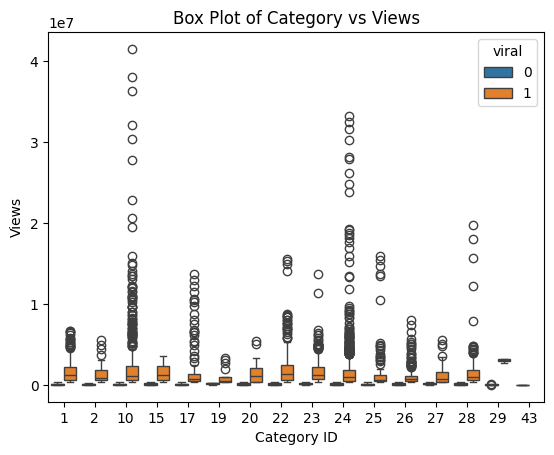

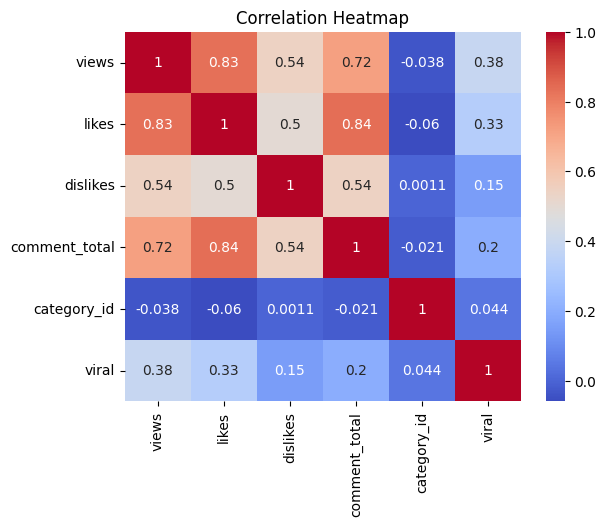

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms or density plots of numerical features
sns.histplot(data=data, x='views', hue='viral', kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Density')
plt.show()

sns.histplot(data=data, x='likes', hue='viral', kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Density')
plt.show()

# Plot scatter plots of numerical features
sns.scatterplot(data=data, x='views', y='likes', hue='viral')
plt.title('Scatter Plot of Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

# Plot box plots of categorical features
sns.boxplot(data=data, x='category_id', y='views', hue='viral')
plt.title('Box Plot of Category vs Views')
plt.xlabel('Category ID')
plt.ylabel('Views')
plt.show()

# Plot correlation heatmap
correlation_matrix = data[['views', 'likes', 'dislikes', 'comment_total', 'category_id', 'viral']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


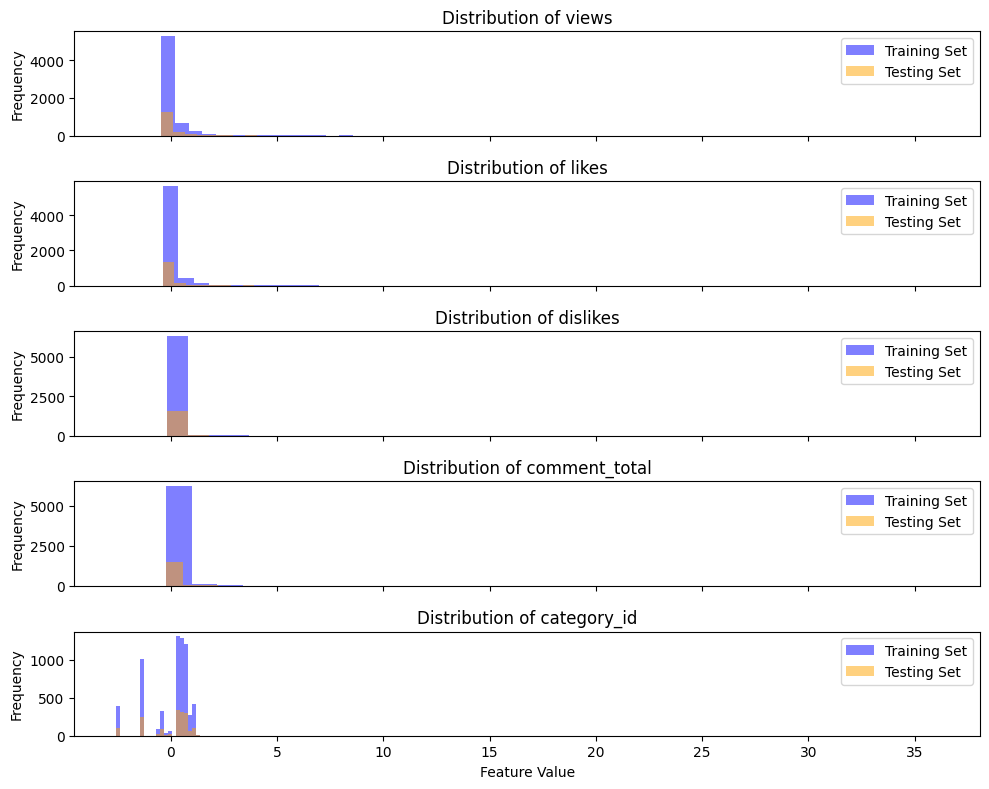

In [7]:
import matplotlib.pyplot as plt

# Plot histograms for each feature in the training and testing sets
fig, axs = plt.subplots(nrows=len(X.columns), ncols=1, figsize=(10, 8), sharex=True)

for i, feature in enumerate(X.columns):
    axs[i].hist(X_train[:, i], alpha=0.5, label='Training Set', color='blue', bins=30)
    axs[i].hist(X_test[:, i], alpha=0.5, label='Testing Set', color='orange', bins=30)
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

plt.xlabel('Feature Value')
plt.tight_layout()
plt.show()


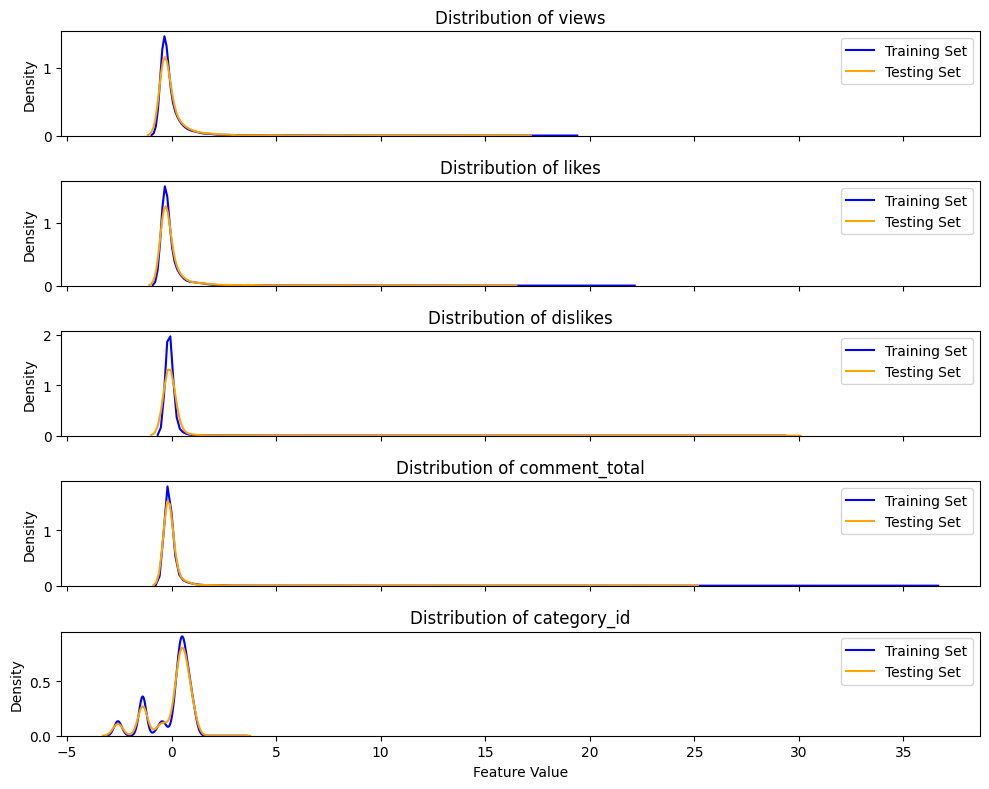

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert training and testing sets to pandas DataFrame for easier plotting
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Plot KDE plots for each feature in the training and testing sets
fig, axs = plt.subplots(nrows=len(X.columns), ncols=1, figsize=(10, 8), sharex=True)

for i, feature in enumerate(X.columns):
    sns.kdeplot(data=X_train_df[feature], label='Training Set', color='blue', ax=axs[i])
    sns.kdeplot(data=X_test_df[feature], label='Testing Set', color='orange', ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_ylabel('Density')
    axs[i].legend()

plt.xlabel('Feature Value')
plt.tight_layout()
plt.show()


# Linear Regression - Roy Zabetski

# Imports
Pandas, numpy, re, matplotlib, counter, and sklearn are required imports for linear regression

In [9]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

This is an exmaple of one of the linear regression comparisons, implemented in code. It evaluates the video's title length and views.

Mean Squared Error (Train): 4541205969938.303
Mean Squared Error (Test): 4839941263591.572
Pearson Correlation Coefficient: -0.04798791118439939


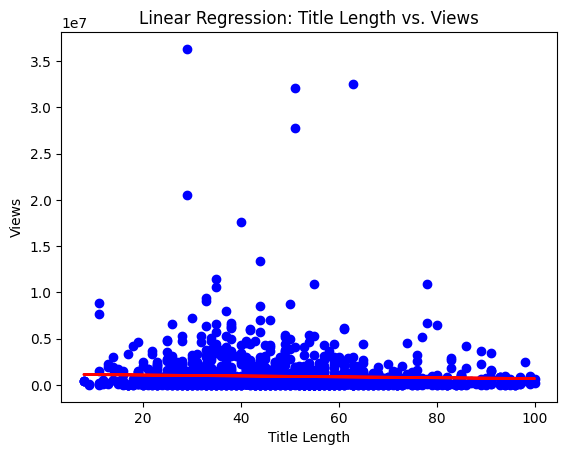

In [13]:
file_path = './USvideos.csv'

mainFrame = pd.read_csv(file_path)

# Extract the length of video titles
mainFrame['title_length'] = mainFrame['title'].apply(len)

#min-max normalize the views
scaler = MinMaxScaler()
mainFrame['views_normalized'] = scaler.fit_transform(mainFrame[['views']])

#Logan's analysis
#mainFrame = mainFrame[mainFrame['views_normalized'] >= 0.05]

# Prepare the data
X = mainFrame[['title_length']]  # Features (title length)
y = mainFrame['views']  # Target variable (views)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate mean squared error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

# Calculate the Pearson correlation coefficient
correlation = mainFrame['title_length'].corr(mainFrame['views'])
print("Pearson Correlation Coefficient:", correlation)

# Plot the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_test, color='red', linewidth=2)
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.title('Linear Regression: Title Length vs. Views')
plt.show()